# Introdução ao RDKit

Neste Notebook, mostraremos algumas funcionalidades do RDKit, um pacote gratuito para quiminformática.

Para uma visão geral de diversas funcionalidades, acesse os *links* [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html) e [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html) (ambos em inglês), dos quais adaptei o código mostrado aqui.

Para usar o RDKit, precisamos baixá-lo, e a forma mais simples é utilizando o Anaconda:

Criamos um ambiente chamado `my-rdkit-env`</br>
`$ conda create -c conda-forge -n my-rdkit-env rdkit`</br>

E ativamos o ambiente</br>
`$ conda activate my-rdkit-env`

Para mais detalhes, acesse: https://www.rdkit.org/docs/Install.html

Para verificar se está com o RDKit instalado, dê o comando `conda list` e verifique se `rdkit` está entre os programas instalados. Se estiver, basta abrir o Jupyter Lab (pode ser necessário instalar, usando `conda install -c conda-forge jupyterlab`), criar um novo Notebook e importar o RDKit:

In [1]:
import rdkit
# Para verificar a versão instalada
print(rdkit.__version__)

2022.03.3


Também é possível importar somente as funcionalidades desejadas em vez de importar o módulo todo. Veremos exemplos a seguir.

## Trabalhando com estruturas químicas

Com o RDKit, estruturas químicas podem ser importadas em diversos formatos, como SMILES, sdf, mol2 e pdb.

Todas essas formas podem ser convertidas em um objeto do tipo `rdkit.Chem.rdchem.Mol`, ou simplesmente **RDKit Mol**, que é a forma utilizada pelo RDKit para representação de estruturas moleculares.

Vamos importar o módulo `Chem` para trabalhar com algumas estruturas:

In [2]:
from rdkit import Chem

In [3]:
# Importando uma molécula a partir da representação SMILES
mol = Chem.MolFromSmiles("CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5")

# Tipo do objeto
type(mol)

rdkit.Chem.rdchem.Mol

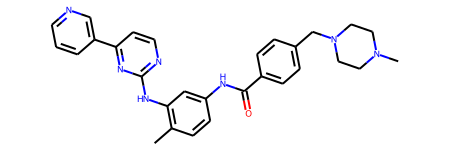

In [4]:
# No Jupyter Notebook, se o output de uma célula for um RDKit Mol, a estrutura é desenhada:
mol

Podemos converter um RDKit Mol a formatos de texto, como MDL molblock e PDB. É possível gerar arquivos de texto usando a *keyword* `file` da função `print()`.

In [5]:
mol = Chem.MolFromSmiles("CCO")

In [6]:
print(Chem.MolToMolBlock(mol))


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END



In [7]:
print(Chem.MolToPDBBlock(mol))

HETATM    1  C1  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    3  O1  UNL     1       0.000   0.000   0.000  1.00  0.00           O  
CONECT    1    2
CONECT    2    3
END



In [8]:
# Escrevendo um arquivo de texto no formato molblock
print(Chem.MolToMolBlock(mol), file=open("ethanol.mol", "a+"))

## Descritores

Podemos calcular diversas propriedades de uma molécula, também chamadas de descritores moleculares (Veja o Notebook [Descritores moleculares]):

In [9]:
from rdkit.Chem import Descriptors

In [10]:
print(f"Massa molecular relativa: {Descriptors.MolWt(mol)}")
print(f"Número de átomos pesados: {Descriptors.HeavyAtomCount(mol)}")
print(f"logP calculado: {Descriptors.MolLogP(mol)}")

Massa molecular relativa: 46.069
Número de átomos pesados: 3
logP calculado: -0.0014000000000000123


O RDKit disponibiliza o cálculo de mais de 200 descritores físico-químicos e estruturais, disponíveis aqui: [Lista de descritores disponíveis](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors).

## Propriedades e funcionalidades dos objetos RDKit Mol

O objeto RDKit Mol possui diversas funcionalidades, que podem ser acessadas usando `help()`. Não é necessário conhecer todas, mas algumas podem ser úteis, como resgatar os índices dos átomos e das ligações, e verificar se a molécula contém certa subestrutura (que podemos usar, por exemplo, para verificar se a molécula contém algum grupo reativo ou potencialmente tóxico).

In [11]:
# Iterando por todos os átomos da molécula e mostrando seu número atômico
m = Chem.MolFromSmiles('CCOC')
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

6
6
8
6


In [14]:
# Átomo com índice = 0
atom = m.GetAtomWithIdx(0)
atom

Você pode executar a célula abaixo para ver as diversas propriedades e funções disponíveis para essa classe `rdkit.Chem.rdchem.Atom`:

In [ ]:
help(atom)

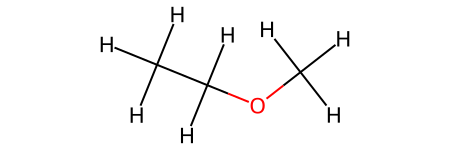

In [16]:
# Adicionando átomos de hidrogênio explícitos
m2 = Chem.AddHs(m)
m2

In [17]:
# Número de átomos
m2.GetNumAtoms()

12

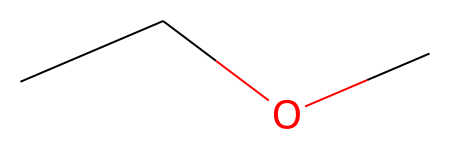

In [18]:
# Removendo átomos de hidrogênio explícitos
m3 = Chem.RemoveHs(m2)
m3

In [19]:
# Número de átomos
m3.GetNumAtoms()

4

In [20]:
# Verificar se átomos pertencem a um anel
m = Chem.MolFromSmiles('OC1C2C1CC2')

print(m.GetAtomWithIdx(0).IsInRing())
print(m.GetAtomWithIdx(1).IsInRing())

False
True


In [21]:
# As ligações também têm identificadores
m = Chem.MolFromSmiles('c1ccccc1')

# Tipo da ligação com índice 0:
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [22]:
# Note que o tipo da ligação muda quando fazemos a Kekulização
Chem.Kekulize(m)
print(m.GetBondWithIdx(0).GetBondType())
print(m.GetBondWithIdx(1).GetBondType())

DOUBLE
SINGLE


In [25]:
# Verificar a presença de uma subestrutura
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')  # subestrutura

mol.HasSubstructMatch(patt)

True

In [26]:
# Índices dos átomos de mol que correspondem à subestrutura patt
mol.GetSubstructMatch(patt)

(7, 6, 5, 4, 2, 3)

## Desenhando estruturas

In [29]:
# Gerando estruturas alinhadas por uma subestrutura em comum

from rdkit.Chem import AllChem, Draw

template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
for m in ms:
    _ = AllChem.GenerateDepictionMatching2DStructure(m, template)

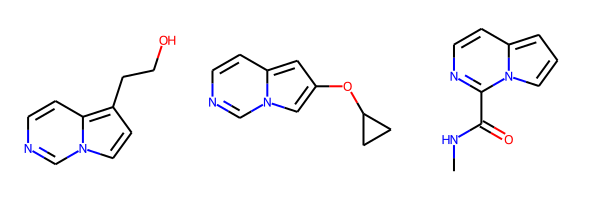

In [32]:
# legends - permite acrescentar legendas
Draw.MolsToGridImage(ms)

In [48]:
# Destacando uma subestrutura

from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

# Vamos condensar o código em uma função para podermos reutilizá-lo
def desenhar_com_subestrutura(mol, patt):
    hit_ats = list(mol.GetSubstructMatch(patt))
    hit_bonds = []

    for bond in patt.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

    d = rdMolDraw2D.MolDraw2DSVG(300, 250) # ou MolDraw2DCairo para obter PNGs
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                       highlightBonds=hit_bonds)
    d.FinishDrawing()
    # Converter a imagem SVG a string
    svg = d.GetDrawingText()
    # Mostrar a imagem no Jupyter notebook
    display(SVG(svg))

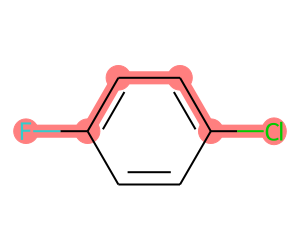

In [49]:
desenhar_com_subestrutura(mol, patt)

*Murcko scaffolds* representam o "núcleo" de uma estrutura química e correspondem a todas as partes da estrutura que contêm anéis, removendo todas as cadeias laterais acíclicas.

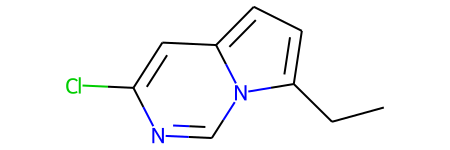

In [53]:
# Estrutura da qual desejamos obter o Murcko Scaffold
from rdkit.Chem.Scaffolds import MurckoScaffold

m1 = Chem.MolFromSmiles('c1nc(Cl)cc2n1c(CC)cc2')
m1

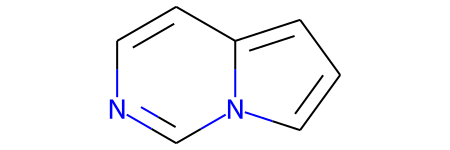

In [54]:
# Murcko scaffold
core = MurckoScaffold.GetScaffoldForMol(m1)
core

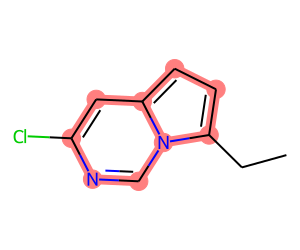

In [56]:
desenhar_com_subestrutura(m1, core)

## *Fingerprints* e Similaridade

*Fingerprints* moleculares são vetores numéricos que representam estruturas moleculares. 

Na maioria das aplicações, os vetores são binários, ou seja, de 0s e 1s, e cada número é chamado de *bit*. Quando um *bit* tem valor 1 dizemos que está ativo, ou seja, a molécula apresenta a subestrutura correspondente àquele *bit*, e quando o valor é 0, a molécula não possui nenhuma subestrutura referente àquele *bit*.

Quando calculamos *fingerprints* da mesma maneira para diversas moléculas, eles terão o mesmo tamanho, e moléculas similares deverão apresentar mais números "1" nas mesmas posições, que (geralmente) correspondem às mesmas subestruturas em comum. Veja o exemplo hipotético a seguir, com 3 estruturas e seus *fingerprints* de 8 *bits*:

|       |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|
| **mol_A** |  0  |  1  |  0  |  0  |  0  |  1  |  0  |  1  |
| **mol_B** |  0  |  0  |  1  |  1  |  0  |  0  |  0  |  1  |
| **mol_C** |  0  |  1  |  0  |  0  |  1  |  1  |  0  |  1  |


A molécula `A` deve ser mais parecida com `C` do que com `B`, porque `A` e `C` possuem três *bits* ativados em comum: 2, 6 e 8, enquanto `A` e `B` possuem somente o *bit* 8 ativado em comum.

Devido à forma como são gerados, é possível que um *bit* corresponda a duas subestruturas diferentes (*bit collision*). Felizmente, isso é relativamente raro se não estiver trabalhando com muitas moléculas e se os *fingerprints* forem grandes o suficiente (normalmente, o tamanho mínimo usado é 1024).

No código abaixo, vamos gerar o `RDKFingerprint` de 2048 *bits* para três estruturas, e calcular suas similaridades usando a função `FingerprintSimilarity`. Para mais informações, veja o Notebook [Fingerprints moleculares no RDKit]() e [Fingerprints moleculares e similaridade]().

In [57]:
from rdkit import DataStructs

# Lista de estruturas no formato RDKit Mol
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

# Gerar lista de fingerprints RDKit
fps = [Chem.RDKFingerprint(x) for x in ms]

# Calcular similaridades pelo índice de Tanimoto
print(DataStructs.FingerprintSimilarity(fps[0], fps[1]))
print(DataStructs.FingerprintSimilarity(fps[0], fps[2]))
print(DataStructs.FingerprintSimilarity(fps[1], fps[2]))

0.6
0.4
0.25


É possível fazer muito mais usando o RDKit. Recomendo olhar os outros Notebooks, pois cada um trata de forma mais aprofundada um tema de interesse na quiminformática.

Não deixe também de acessar os *links* [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html) e [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html) (ambos em inglês).